# Exploratory Data Analysis - Heart Disease Dataset

This notebook covers the EDA requirements:
- Histograms
- Correlation heatmap
- Class balance visualization
- Interpretation of plots

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Add src to path to import preprocessing
sys.path.append(os.path.abspath(os.path.join('..', 'src')))
from preprocessing import clean_dataset

# Load and clean data
df = pd.read_csv('../data/heart.csv', header=None)
df = clean_dataset(df)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,0.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,2.0,0.0,1.0,0
1,67.0,1.0,3.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,1.0,3.0,0.0,1
2,67.0,1.0,3.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,1.0,2.0,2.0,1
3,37.0,1.0,2.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,2.0,0.0,0.0,0
4,41.0,0.0,1.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,0.0,0.0,0.0,0


## 1. Histograms
Visualizing the distribution of numerical features.

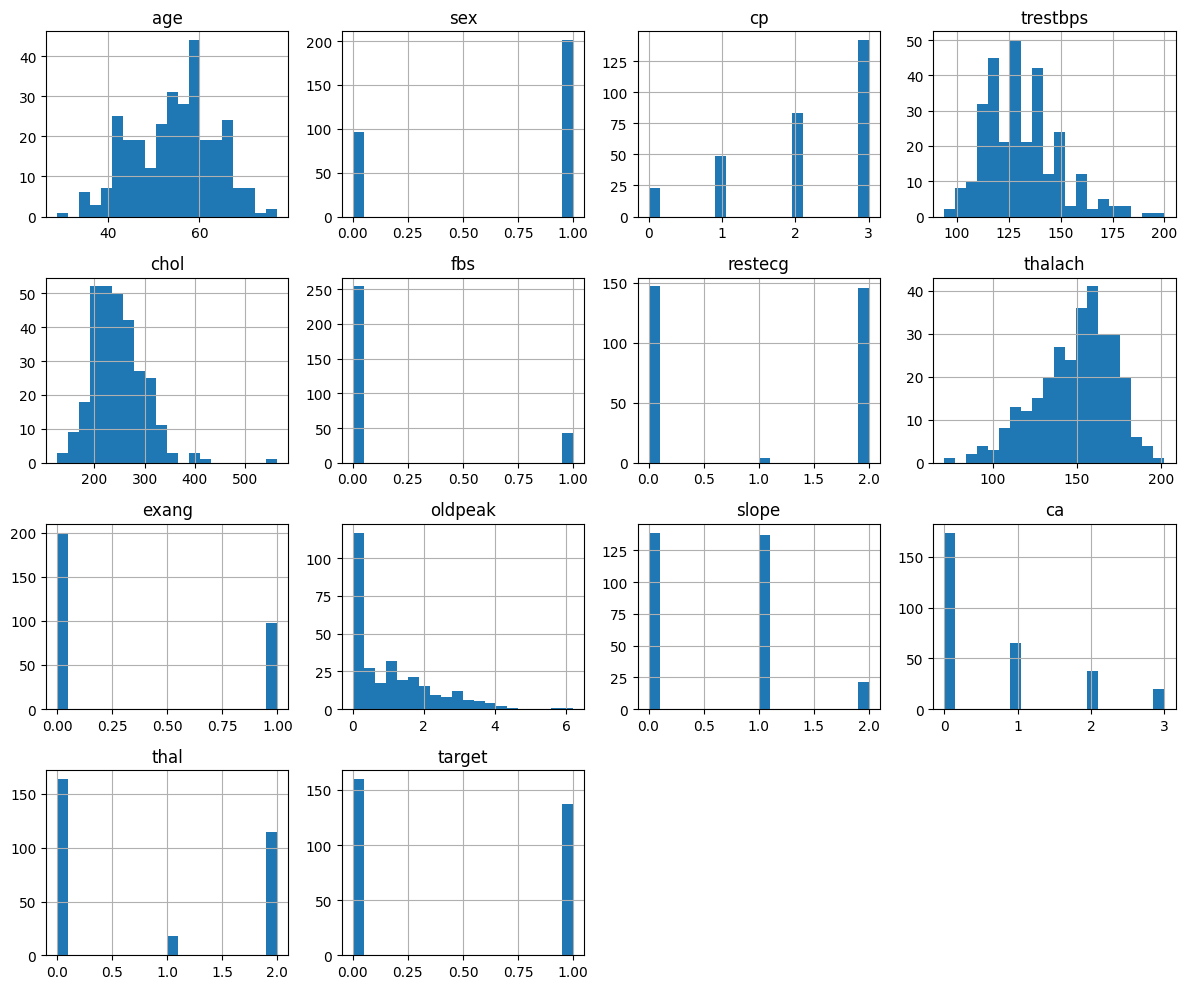

In [2]:
df.hist(figsize=(12, 10), bins=20)
plt.tight_layout()
plt.show()

### Interpretation
- Age seems normally distributed.
- Cholesterol has some outliers.
- Max heart rate (thalach) is left-skewed.

## 2. Correlation Heatmap
Understanding relationships between features.

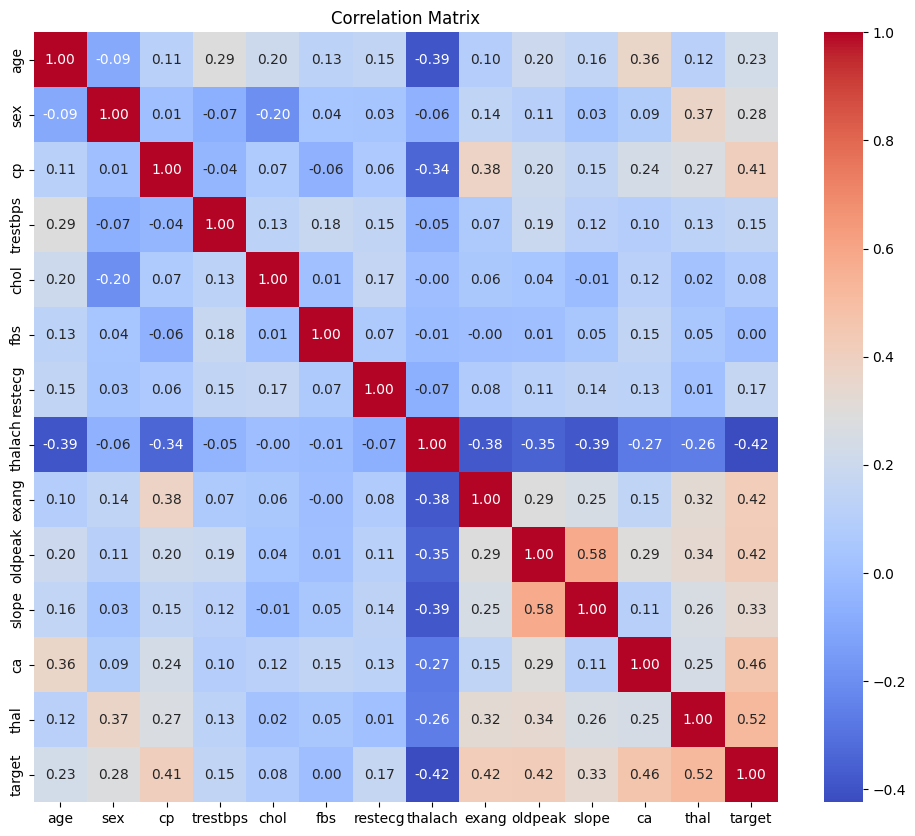

In [3]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Interpretation
- 'cp' (chest pain) and 'thalach' (max heart rate) show positive correlation with target.
- 'exang' (exercise induced angina) and 'oldpeak' show negative correlation.

## 3. Class Balance Visualization
Checking if the dataset is balanced.

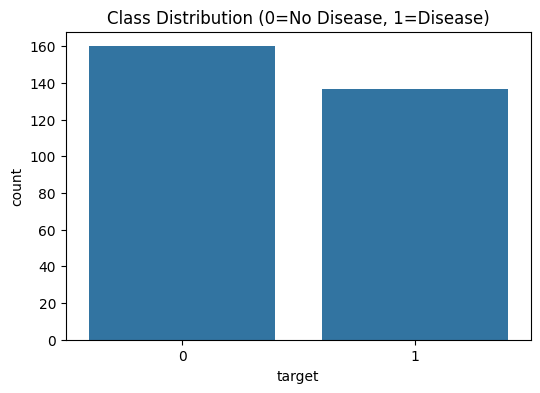

target
0    0.538721
1    0.461279
Name: proportion, dtype: float64


In [4]:
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=df)
plt.title('Class Distribution (0=No Disease, 1=Disease)')
plt.show()

print(df['target'].value_counts(normalize=True))

### Interpretation
- The dataset is relatively balanced, though not perfectly equal. This suggests accuracy can be a reasonable metric, but we should still look at precision/recall.